In [1]:
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt

#raw_path = "/home/ihsan/Documents/thesis_generator/results/devin/to_process/" #needs the absolute path, no tildes!


#usb drive
raw_path = '/media/ihsan/LID_FLASH_1/Thesis/thesis_generator/results/run_2/'
#processed_path = '/media/ihsan/LID_FLASH_1/Thesis/thesis_generator/results/run_2/processed'
processed_path = "/home/ihsan/Documents/thesis_models/unsplit"
items = os.listdir(raw_path)
print(type(items))
for file in items:
    if ('.csv') not in str(file[-4:]) or str(file)=="processed":
        del items[items.index(file)]

print("items to iterate over: {}".format(items))

seq_length_dict = {}
seq_length_dict_filename = processed_path + "/sequence_lengths.json"
#suffix = "3a"
#csv_path = "~/Documents/thesis_generator/results/devin/crack_growth_sequence" + suffix + ".csv"
sequence_lengths = {} #save sequence lengths as a dict. or maybe a json?
header_names = (pd.read_csv(raw_path + str([file for file in items][0]))).columns.values #headers were only saved on the 1st csv in the series.. my bad. 

file = [file for file in items][1]
print("File being read: {}".format(str(file)))
print("Header names: {}".format(header_names))
csv_path = raw_path + str(file)
if str(file) == 'crack_growth_sequence1b_0.csv':
    cg_seq_df = pd.read_csv(csv_path)
    header_names = cg_seq_df.columns.values
else:
    cg_seq_df = pd.read_csv(csv_path, names=header_names)

print("Column Values: {}".format(cg_seq_df.columns.values))

train_list = ['StepIndex', 'delta_K_current_1', 'ctip_posn_curr_1', 'delta_K_current_2', 'ctip_posn_curr_2',
              'delta_K_current_3', 'ctip_posn_curr_3', 'delta_K_current_4', 'ctip_posn_curr_4', 'Load_1',
              'Load_2','delta_a_current_1', 'delta_a_current_2', 'delta_a_current_3', 'delta_a_current_4',
             'pz_rad_curr_1','pz_rad_curr_2','pz_rad_curr_3','pz_rad_curr_4',
             'crack_length_1','crack_length_2','crack_length_3','crack_length_4']  # and seq_id,somehow

label_list = ['StepIndex', 'delta_a_current_1', 'delta_a_current_2', 'delta_a_current_3', 'delta_a_current_4']

train_df = cg_seq_df[train_list]
threshold_length = 0.135
#add the % damage column
#train_df['percent_damage'] = np.max(train_df['crack_length_1']/threshold_length,train_df['crack_length_2']/threshold_length,train_df['crack_length_3']/threshold_length,
                                 #train_df['crack_length_4']/threshold_length)
label_train_df = cg_seq_df[label_list]

# labels_csv_path = "~/Documents/thesis_generator/results/devin/label" + suffix + "_headers"+ ".csv"
# train_csv_path = "~/Documents/thesis_generator/results/devin/train" + suffix + "_headers" + ".csv"

indices = train_df[train_df['StepIndex'] == 1].index.tolist()
indices_offset_min1 = [i - 1 for i in indices]
print("file {}'s indices_offset_min1 {}".format(str(file), indices_offset_min1))
indices_offset_min1.pop(0)
print("indices: {}, indices_offset_min1: {}".format(indices, indices_offset_min1))

ranges = [(t, s) for t, s in zip(indices, indices_offset_min1)]
# print("before changing :{}".format(ranges))
'''for tuple in ranges:
    print(tuple)
    tuple[1:][0] = (tuple[1:][0]) + 1'''

# ranges[1:][0] = ranges[1:][0] + 1
print("\nafter changing :{} ".format(ranges))
# print("lengths: {} ".format([indices[4]-indices[3],indices[3]-indices[2],indices[2]-indices[1],indices[1]-indices[0]]))
print("lengths: {} ".format([t - s for (s, t) in ranges]))

i = 0
train_df_list =[]

for indices_as_tuples in ranges:
    i = i + 1
    print("indices as tuples: {}".format(indices_as_tuples))
    train_df_list.append(train_df[indices_as_tuples[0]:indices_as_tuples[1]])
    train_df_as_np_array = train_df[indices_as_tuples[0]:indices_as_tuples[1]].values
    label_train_df_as_np_array = label_train_df[indices_as_tuples[0]:indices_as_tuples[1]].values
    print("df_as_np_array shape: {}".format(train_df_as_np_array.shape))
    print("file: {}".format(file))
    identifier = str(str(file)[-6:-4])  # eg 1a 2a etc
    print("str: {}".format(identifier))
    np_train_path = processed_path + "/sequence" + identifier + "_" + str(i) + ".npy"
    print("np_train_path: {}".format(np_train_path))
    np_label_train_path = processed_path + "/sequence_" + identifier + "_" + str(i) + "_label_.npy"
    seq_length_dict["sequence_" + identifier + "_" + str(i)] = indices_as_tuples[1] - indices_as_tuples[0]


<type 'list'>
items to iterate over: ['crack_growth_sequence1b_0.csv', 'crack_growth_sequence1b_1.csv', 'crack_growth_sequence1b_2.csv', 'crack_growth_sequence1b_3.csv', 'crack_growth_sequence1b_4.csv', 'crack_growth_sequence1b_5.csv']
File being read: crack_growth_sequence1b_1.csv
Header names: ['Unnamed: 0' 'StepIndex' 'direction_1' 'delta_a_current_1'
 'delta_K_prev_1' 'delta_K_current_1' 'ctip_posn_curr_1' 'ctip_posn_prev_1'
 'crack_length_last_overload_1' 'crack_length_1' 'K_last_overload_1'
 'pz_rad_curr_1' 'pz_rad_prev_1' 'crack_id_1' 'hole_1' 'direction_2'
 'delta_a_current_2' 'delta_K_prev_2' 'delta_K_current_2'
 'ctip_posn_curr_2' 'ctip_posn_prev_2' 'crack_length_last_overload_2'
 'crack_length_2' 'K_last_overload_2' 'pz_rad_curr_2' 'pz_rad_prev_2'
 'crack_id_2' 'hole_2' 'direction_3' 'delta_a_current_3' 'delta_K_prev_3'
 'delta_K_current_3' 'ctip_posn_curr_3' 'ctip_posn_prev_3'
 'crack_length_last_overload_3' 'crack_length_3' 'K_last_overload_3'
 'pz_rad_curr_3' 'pz_rad_prev

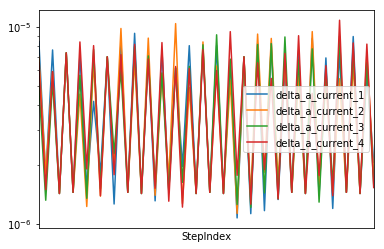

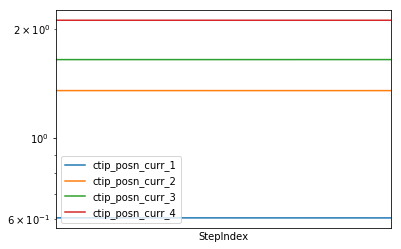

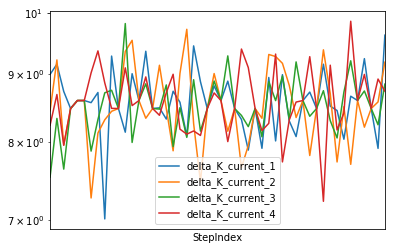

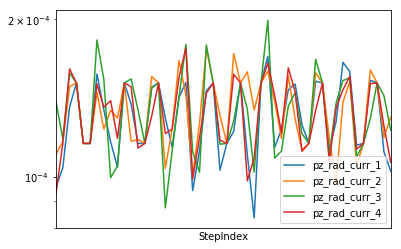

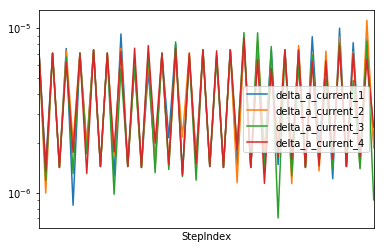

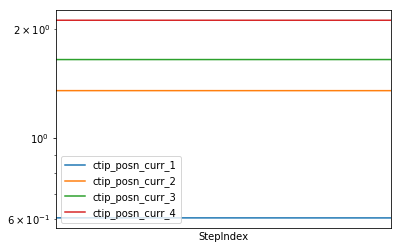

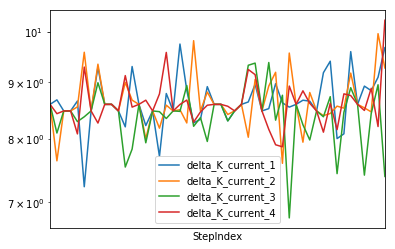

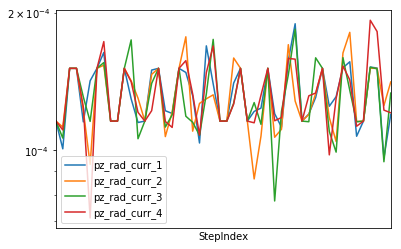

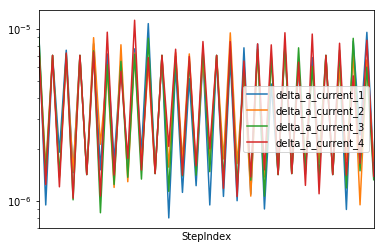

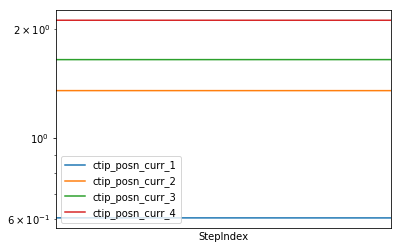

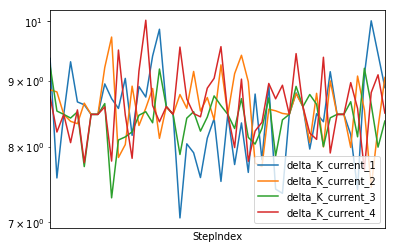

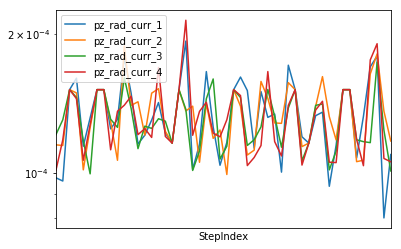

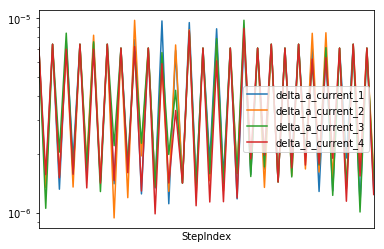

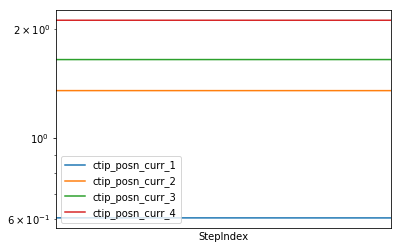

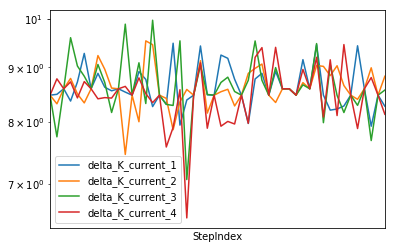

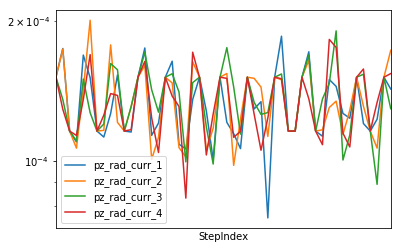

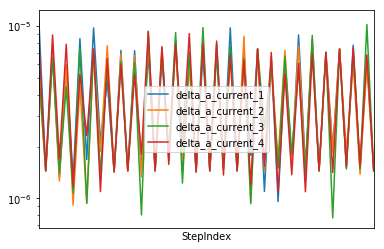

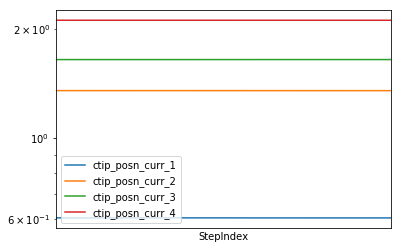

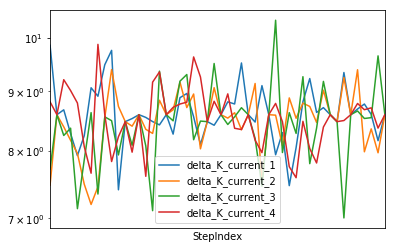

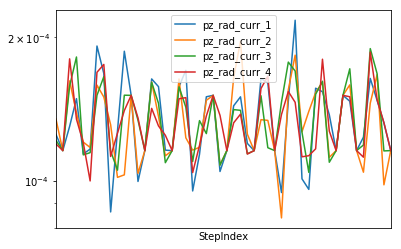

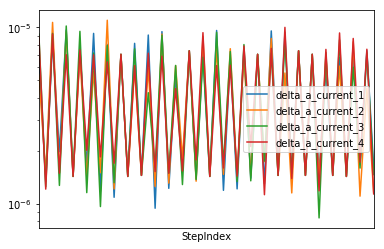

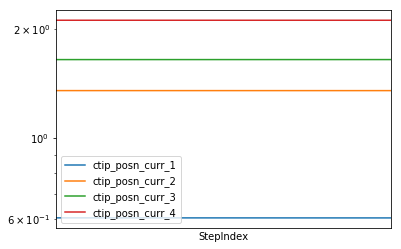

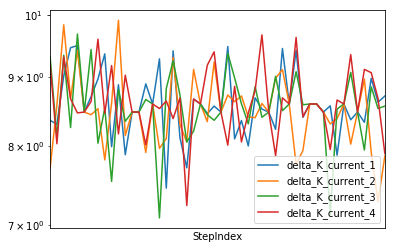

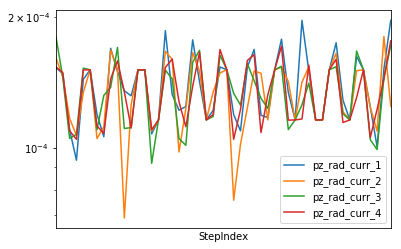

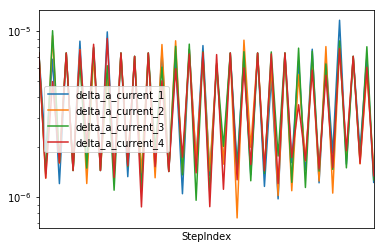

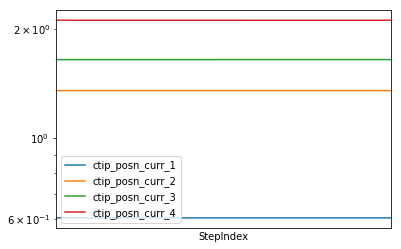

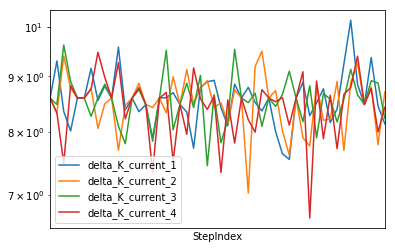

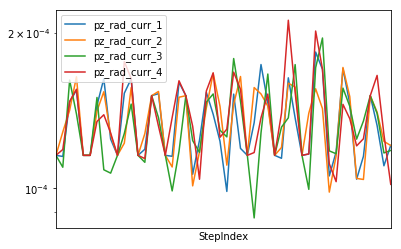

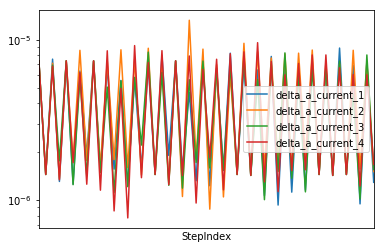

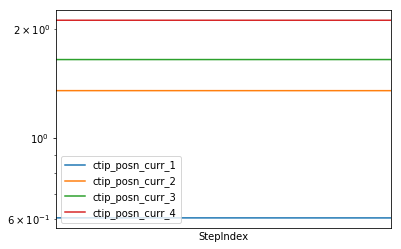

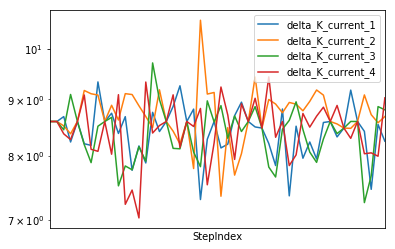

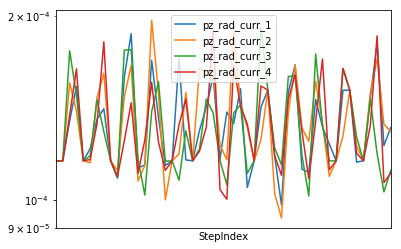

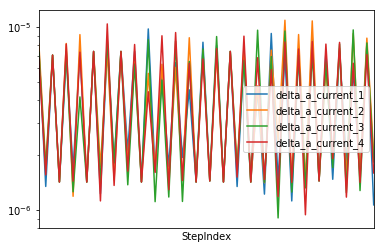

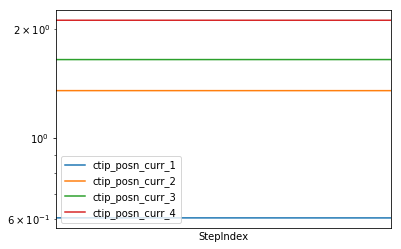

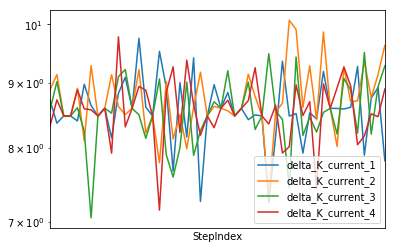

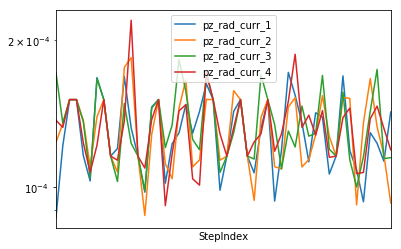

In [3]:
plt.clf()
plt.close()
for df in train_df_list:
    #print ("df column names: {}".format(df.columns))
    df_to_plot = df[-50:]
    df_to_plot.plot(x='StepIndex',y=['delta_a_current_1', 'delta_a_current_2', 'delta_a_current_3', 'delta_a_current_4'],loglog=True)
    df_to_plot.plot(x='StepIndex',y=['ctip_posn_curr_1','ctip_posn_curr_2','ctip_posn_curr_3','ctip_posn_curr_4'],loglog=True)
    df_to_plot.plot(x='StepIndex',y=['delta_K_current_1','delta_K_current_2','delta_K_current_3','delta_K_current_4'],loglog=True)
    df_to_plot.plot(x='StepIndex',y=['pz_rad_curr_1','pz_rad_curr_2','pz_rad_curr_3','pz_rad_curr_4'],loglog=True)
    #df_to_plot.plot(x='StepIndex',y=['Load_1','Load_2'],loglog=True)

    #plt.savefig(plot_1,processed_path + "/plot_1_" + str(train_df_list.index(df)) + ".png")
    #plt.savefig(plot_1,processed_path + "/plot_2_" + str(train_df_list.index(df)) + ".png")
plt.show()

In [ ]:
for file in items:
    
        # seq_length_dict = json.load(open(seq_length_dict))

        # str(str(items)[-6:-4]) is the 1a, 2a etc

        # UNCOMMENT THESE IF YOU WANT TO SAVETHE ARRAYS!!!
        np.save(np_train_path, train_df_as_np_array)
        np.save(np_label_train_path, label_train_df_as_np_array)

print(seq_length_dict)
json.dump(seq_length_dict, open(seq_length_dict_filename, 'wb'))